# Packages


In [49]:
import numpy as np
import pandas as pd
import random
from sklearn.cluster import DBSCAN, KMeans

# visualisation
from plotnine import *

# Data Preparation

In [25]:
num_points = 4000
x = random.sample(population=set(np.linspace(start=-10, stop=10, num=num_points)), k=num_points)
y = random.sample(population=set(np.linspace(start=-10, stop=10, num=num_points)), k=num_points)
z = [(x**2 + y**2) for x, y in zip(x, y)]

df = pd.DataFrame(list(zip(x, y, z)), columns=['x', 'y', 'z'])
df['class'] = [1 if ((i<10) | (80 < i< 100))  else 0 for i in df['z']]

We can clearly see two different patterns - an inner ring and an outer ring. The task is to find an algorithm that can distinguish both classes.

In [34]:
df = df[df['class']==1]  # filter for class 1
df = df.drop(['z', 'class'], axis=1)  # delete not required columns

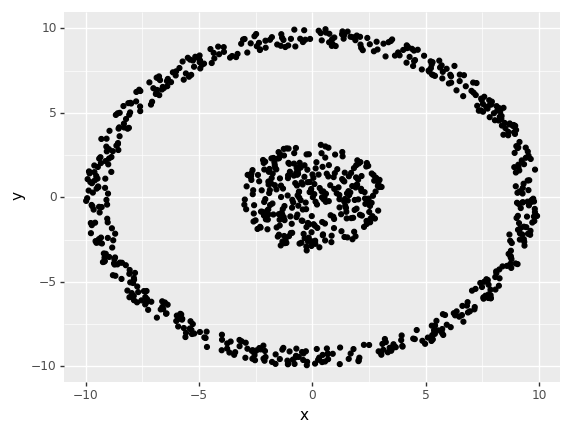

<ggplot: (-9223371867786232397)>

In [35]:
(ggplot(data=df) +
  aes(x='x', y='y') +
  geom_point()
)

# Modeling

In [45]:
clustering = DBSCAN(eps=3, min_samples=2).fit(df)

In [47]:
df['labels'] = clustering.labels_

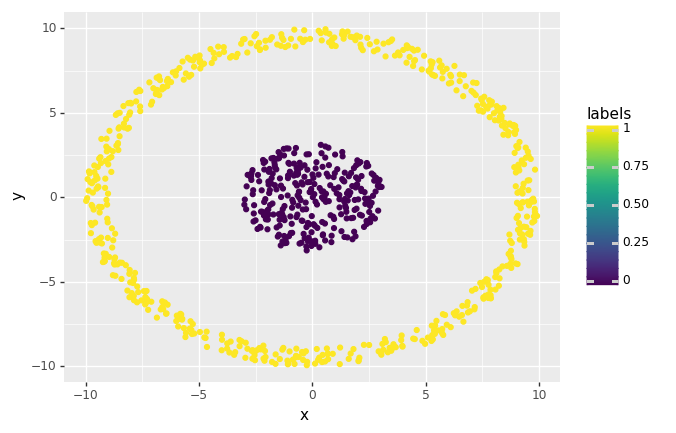

<ggplot: (-9223371867784844663)>

In [48]:
(ggplot(data=df) +
  aes(x='x', y='y', color='labels') +
  geom_point()
)

The two different classes were distinguished perfectly.